In [72]:
import sys, os
sys.path.append(os.path.realpath('../../'))
RES_DIR = os.path.realpath('../../data/results')
os.environ["PSP_DATA_DIR"] = os.path.realpath("../../data/downloads/")

import glob
import pyspedas
from pyspedas import time_string, time_double
from pytplot import tplot, get_data, cdf_to_tplot, store_data
import sunpy 
import datetime
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt


import tools_ervin
import tools_ervin.utilities as utils
import tools_ervin.sigma as sigma
import tools_ervin.psp_funcs as psp_funcs
import tools_ervin.pfss_funcs as pfss_funcs


import sunpy.coordinates as scoords
from sunpy.coordinates import spice
from scipy.interpolate import interp1d
from plasmapy.formulary import beta, magnetic_pressure, thermal_pressure, ion_sound_speed
from astropy.constants import k_B

import scipy.constants as con


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation, rc
from IPython.display import HTML
from astropy.coordinates import SkyCoord
from astropy.time import Time

import astropy.constants as const
import astropy.units as u
from ntpath import basename
import numpy as np
from urllib.request import urlretrieve
import os 

rc('animation',html='html5')


# these lines are commented out because these packages are archived and not maintained anymore
# I am trying to use spiceypy for spice kernels instead

# import heliopy.data.spice as spicedata
# import heliopy.spice as spice
# import astrospice
# for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 

In [2]:
time_range = ['2025-03-21/12:00', '2025-03-24/00:00']
enc = 'E23'
edens = 'ENC23_QTN_Electron_Density.csv'
dens_avg = 10

In [3]:
fields_vars = pyspedas.psp.fields(trange=time_range, time_clip=True, datatype='mag_RTN_4_Sa_per_Cyc',)

03-Nov-25 12:38:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2025/
03-Nov-25 12:38:51: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2025/psp_fld_l2_mag_rtn_4_sa_per_cyc_20250321_v02.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/fields/l2/mag_rtn_4_per_cycle/2025/psp_fld_l2_mag_rtn_4_sa_per_cyc_20250321_v02.cdf
03-Nov-25 12:38:52: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/fields/l2/mag_rtn_4_per_cycle/2025/psp_fld_l2_mag_rtn_4_sa_per_cyc_20250321_v02.cdf complete, 8.796 MB in 1.5 sec (5.986 MB/sec) (transfer_normal)
03-Nov-25 12:38:53: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2025/psp_fld_l2_mag_rtn_4_sa_per_cyc_20250322_v02.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/fields/l2/mag_rtn_4_per_cycle/2025/psp_fld_l2_mag_rtn_4_sa_per_cyc_20250322_v02.cdf
03-Nov-25 12:38:55: Download of /home/yjzhu/Solar/psp_20250322/data/downloa

In [4]:
rfs_vars = pyspedas.psp.fields(trange=time_range, time_clip=True, level='l3', datatype='rfs_lfr')

03-Nov-25 12:39:24: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/rfs_lfr/2025/
03-Nov-25 12:39:25: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/rfs_lfr/2025/psp_fld_l3_rfs_lfr_20250321_v03.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/fields/l3/rfs_lfr/2025/psp_fld_l3_rfs_lfr_20250321_v03.cdf
03-Nov-25 12:39:36: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/fields/l3/rfs_lfr/2025/psp_fld_l3_rfs_lfr_20250321_v03.cdf complete, 86.447 MB in 11.1 sec (7.758 MB/sec) (transfer_normal)
03-Nov-25 12:39:38: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l3/rfs_lfr/2025/psp_fld_l3_rfs_lfr_20250322_v03.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/fields/l3/rfs_lfr/2025/psp_fld_l3_rfs_lfr_20250322_v03.cdf
03-Nov-25 12:39:45: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/fields/l3/rfs_lfr/2025/psp_fld_l3_rfs_lfr_20250322_v03.cdf complete, 68.072 MB in 7.2 sec (9.467 MB/sec) (transfer_normal)
03-Nov-25

In [5]:
pvars = pyspedas.psp.spi(trange=time_range, datatype='sf00_l3_mom', 
                            level='l3', time_clip=True)

03-Nov-25 12:40:10: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2025/


Using LEVEL=L3


03-Nov-25 12:40:11: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2025/psp_swp_spi_sf00_l3_mom_20250321_v04.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf00_l3_mom/2025/psp_swp_spi_sf00_l3_mom_20250321_v04.cdf
03-Nov-25 12:40:14: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf00_l3_mom/2025/psp_swp_spi_sf00_l3_mom_20250321_v04.cdf complete, 16.047 MB in 3.0 sec (5.340 MB/sec) (transfer_normal)
03-Nov-25 12:40:15: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2025/psp_swp_spi_sf00_l3_mom_20250322_v04.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf00_l3_mom/2025/psp_swp_spi_sf00_l3_mom_20250322_v04.cdf
03-Nov-25 12:40:18: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf00_l3_mom/2025/psp_swp_spi_sf00_l3_mom_20250322_v04.cdf complete, 30.011 MB in 3.5 sec (8.620 MB/sec) (transfer_normal)
03-Nov-25 12:40:21: Down

In [6]:
avars = pyspedas.psp.spi(trange=time_range, datatype='sf0a_l3_mom', 
                            level='l3', time_clip=True)

03-Nov-25 12:40:25: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2025/


Using LEVEL=L3


03-Nov-25 12:40:27: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2025/psp_swp_spi_sf0a_l3_mom_20250321_v04.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf0a_l3_mom/2025/psp_swp_spi_sf0a_l3_mom_20250321_v04.cdf
03-Nov-25 12:40:29: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf0a_l3_mom/2025/psp_swp_spi_sf0a_l3_mom_20250321_v04.cdf complete, 16.048 MB in 2.3 sec (7.104 MB/sec) (transfer_normal)
03-Nov-25 12:40:30: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf0a_l3_mom/2025/psp_swp_spi_sf0a_l3_mom_20250322_v04.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf0a_l3_mom/2025/psp_swp_spi_sf0a_l3_mom_20250322_v04.cdf
03-Nov-25 12:40:37: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spi/l3/spi_sf0a_l3_mom/2025/psp_swp_spi_sf0a_l3_mom_20250322_v04.cdf complete, 30.011 MB in 6.7 sec (4.470 MB/sec) (transfer_normal)
03-Nov-25 12:40:38: Down

In [7]:
spe_vars = pyspedas.psp.spe(trange=time_range, level='l2', time_clip=True)

03-Nov-25 12:40:48: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spe/l2/spa_sf1_32e/2025/
03-Nov-25 12:40:50: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spe/l2/spa_sf1_32e/2025/psp_swp_spa_sf1_l2_32e_20250321_v04.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spe/l2/spa_sf1_32e/2025/psp_swp_spa_sf1_l2_32e_20250321_v04.cdf
03-Nov-25 12:40:56: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spe/l2/spa_sf1_32e/2025/psp_swp_spa_sf1_l2_32e_20250321_v04.cdf complete, 45.229 MB in 5.8 sec (7.777 MB/sec) (transfer_normal)
03-Nov-25 12:40:57: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spe/l2/spa_sf1_32e/2025/psp_swp_spa_sf1_l2_32e_20250322_v04.cdf to /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spe/l2/spa_sf1_32e/2025/psp_swp_spa_sf1_l2_32e_20250322_v04.cdf
03-Nov-25 12:41:02: Download of /home/yjzhu/Solar/psp_20250322/data/downloads/sweap/spe/l2/spa_sf1_32e/2025/psp_swp_spa_sf1_l2_32e_20250322_v04.cdf c

In [9]:
files = glob.glob(os.path.join(os.path.realpath(
    os.path.join(os.getenv("PSP_DATA_DIR"), 'fields/l2/mag_rtn_4_per_cycle/2023')
    ), "*"), recursive=True)
vars = cdf_to_tplot(files[4:8])
dt = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

In [14]:
save_mag = True
if save_mag:
    date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]

    rd = {'Time': date_obj, 'Br': dt.y[:, 0], 'Bt': dt.y[:, 1], 'Bn': dt.y[:, 2]}
    dfmag = pd.DataFrame(data=rd)
    dfmag.to_csv(os.path.join(RES_DIR, 'fields.csv'))

In [10]:
waveoutput = pyspedas.analysis.twavpol.wavpol(dt.times, dt.y[:, 0], dt.y[:, 1], dt.y[:, 2])
waveoutput

03-Nov-25 12:42:51: wavpol Warning: file sampling frequency changes from 4.577645161079085Hz to 4.577630173062042Hz
03-Nov-25 12:42:51: n_batches: 1
03-Nov-25 12:42:51: Total number of steps:7725
03-Nov-25 12:42:52: Total number of possible FFT in the batch no 0 is:7722.0
03-Nov-25 12:42:52: wavpol step: 0 
03-Nov-25 12:42:57: wavpol step: 40 
03-Nov-25 12:43:01: wavpol step: 80 
03-Nov-25 12:43:05: wavpol step: 120 
03-Nov-25 12:43:10: wavpol step: 160 
03-Nov-25 12:43:13: wavpol step: 200 
03-Nov-25 12:43:18: wavpol step: 240 
03-Nov-25 12:43:22: wavpol step: 280 
03-Nov-25 12:43:26: wavpol step: 320 
03-Nov-25 12:43:30: wavpol step: 360 
03-Nov-25 12:43:34: wavpol step: 400 
03-Nov-25 12:43:38: wavpol step: 440 
03-Nov-25 12:43:43: wavpol step: 480 
03-Nov-25 12:43:47: wavpol step: 520 
03-Nov-25 12:43:51: wavpol step: 560 
03-Nov-25 12:43:55: wavpol step: 600 
03-Nov-25 12:43:59: wavpol step: 640 
03-Nov-25 12:44:03: wavpol step: 680 
03-Nov-25 12:44:07: wavpol step: 720 
03-Nov-25

(array([1.74255843e+09, 1.74255846e+09, 1.74255848e+09, ...,
        1.74277438e+09,            nan,            nan], shape=(7725,)),
 array([0.        , 0.01788143, 0.03576285, 0.05364428, 0.07152571,
        0.08940713, 0.10728856, 0.12516998, 0.14305141, 0.16093284,
        0.17881426, 0.19669569, 0.21457712, 0.23245854, 0.25033997,
        0.2682214 , 0.28610282, 0.30398425, 0.32186568, 0.3397471 ,
        0.35762853, 0.37550995, 0.39339138, 0.41127281, 0.42915423,
        0.44703566, 0.46491709, 0.48279851, 0.50067994, 0.51856137,
        0.53644279, 0.55432422, 0.57220565, 0.59008707, 0.6079685 ,
        0.62584992, 0.64373135, 0.66161278, 0.6794942 , 0.69737563,
        0.71525706, 0.73313848, 0.75101991, 0.76890134, 0.78678276,
        0.80466419, 0.82254561, 0.84042704, 0.85830847, 0.87618989,
        0.89407132, 0.91195275, 0.92983417, 0.9477156 , 0.96559703,
        0.98347845, 1.00135988, 1.01924131, 1.03712273, 1.05500416,
        1.07288558, 1.09076701, 1.10864844, 1.1265

In [11]:
waveoutput2 = pyspedas.twavpol('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')

03-Nov-25 13:16:09: wavpol Warning: file sampling frequency changes from 4.577645161079085Hz to 4.577630173062042Hz
03-Nov-25 13:16:10: n_batches: 1
03-Nov-25 13:16:10: Total number of steps:7725
03-Nov-25 13:16:11: Total number of possible FFT in the batch no 0 is:7722.0
03-Nov-25 13:16:12: wavpol step: 0 
03-Nov-25 13:16:17: wavpol step: 40 
03-Nov-25 13:16:21: wavpol step: 80 
03-Nov-25 13:16:25: wavpol step: 120 
03-Nov-25 13:16:29: wavpol step: 160 
03-Nov-25 13:16:32: wavpol step: 200 
03-Nov-25 13:16:36: wavpol step: 240 
03-Nov-25 13:16:40: wavpol step: 280 
03-Nov-25 13:16:44: wavpol step: 320 
03-Nov-25 13:16:48: wavpol step: 360 
03-Nov-25 13:16:52: wavpol step: 400 
03-Nov-25 13:16:55: wavpol step: 440 
03-Nov-25 13:16:59: wavpol step: 480 
03-Nov-25 13:17:03: wavpol step: 520 
03-Nov-25 13:17:07: wavpol step: 560 
03-Nov-25 13:17:11: wavpol step: 600 
03-Nov-25 13:17:15: wavpol step: 640 
03-Nov-25 13:17:19: wavpol step: 680 
03-Nov-25 13:17:23: wavpol step: 720 
03-Nov-25

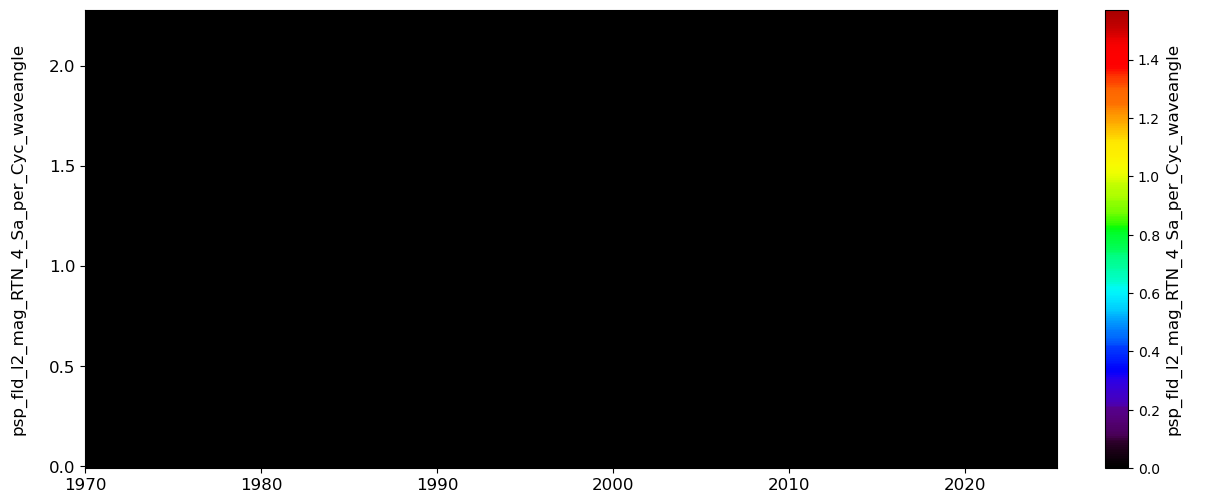

In [12]:
tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc_waveangle'])

(7725, 128)

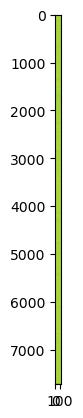

In [13]:
len(waveoutput[0])
plt.imshow(waveoutput[3])
waveoutput[3].shape

In [17]:
path = glob.glob(os.path.join(os.path.realpath(
    os.path.join(os.getenv('PSP_DATA_DIR'), 'fields/l3/rfs_lfr')
    ), "*"), recursive=True)
files = glob.glob(os.path.join(path[0], '*'))[:2]
vars = cdf_to_tplot(files)

In [19]:
dt = get_data('psp_fld_l3_rfs_lfr_auto_averages_ch0_V1V2')

In [21]:
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]

rd = {'Time': date_obj, 'Br': dt.y[:, 0], 'Bt': dt.y[:, 1], 'Bn': dt.y[:, 2]}
df = pd.DataFrame(data=rd)
df = df.set_index(df.Time)
df.to_csv(os.path.join(RES_DIR, 'fields_rfs.csv'))

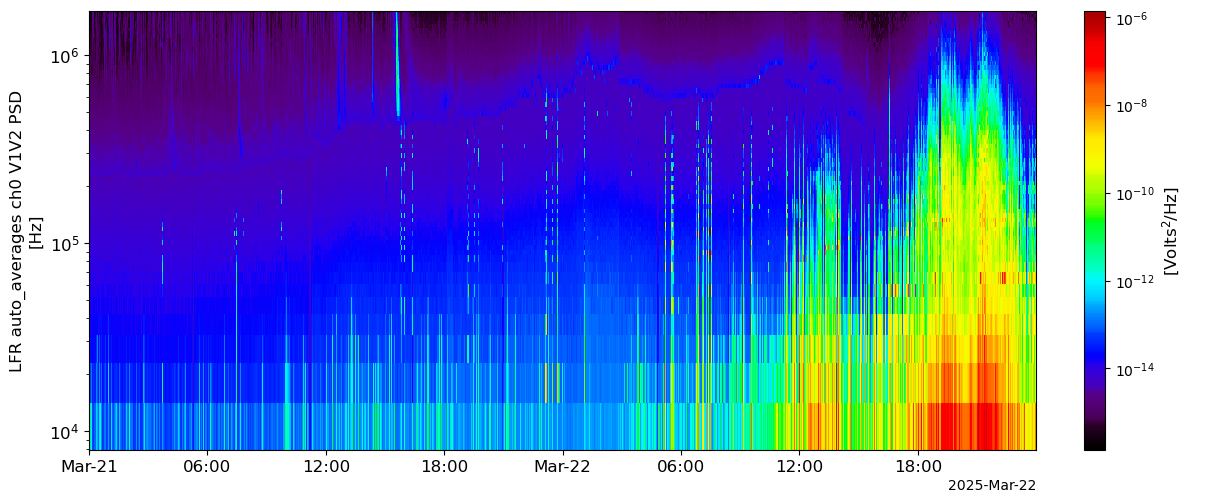

In [22]:
tplot(['psp_fld_l3_rfs_lfr_auto_averages_ch0_V1V2'])

In [23]:
path = glob.glob(os.path.join(os.path.realpath(os.path.join(
    os.getenv('PSP_DATA_DIR'), 'sweap/spi/l3/spi_sf00_l3_mom'
    )), "*"), recursive=True)
files = glob.glob(os.path.join(path[0], '*'))

vars = cdf_to_tplot(files)

In [24]:
dt = get_data('VEL_RTN_SUN')
dt2 = get_data('DENS')
dt3 = get_data('TEMP')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]

In [25]:
rd = {'Time': date_obj, 'vr': np.abs(dt.y[:, 0]), 'vt': dt.y[:, 1], 'vn': dt.y[:, 2], 'Np': dt2.y, 'Tp': dt3.y}
df = pd.DataFrame(data=rd)

In [26]:
vx, vy, vz = [get_data('VEL_SC').y[:, i] for i in np.arange(0, 3)]
mx, my, mz = [get_data('MAGF_INST').y[:, i] for i in np.arange(0, 3)]
vdotb = vx*mx + vy*my + vz*mz
v = np.sqrt(vx**2 + vy**2 + vz**2)
b = np.sqrt(mx**2 + my**2 + mz**2)
angle_vb = np.arccos(vdotb/(v*b))

df['angle_vb'] = angle_vb

# df = df.set_index(df.Time)
df.to_csv(os.path.join(RES_DIR, 'protons.csv'))

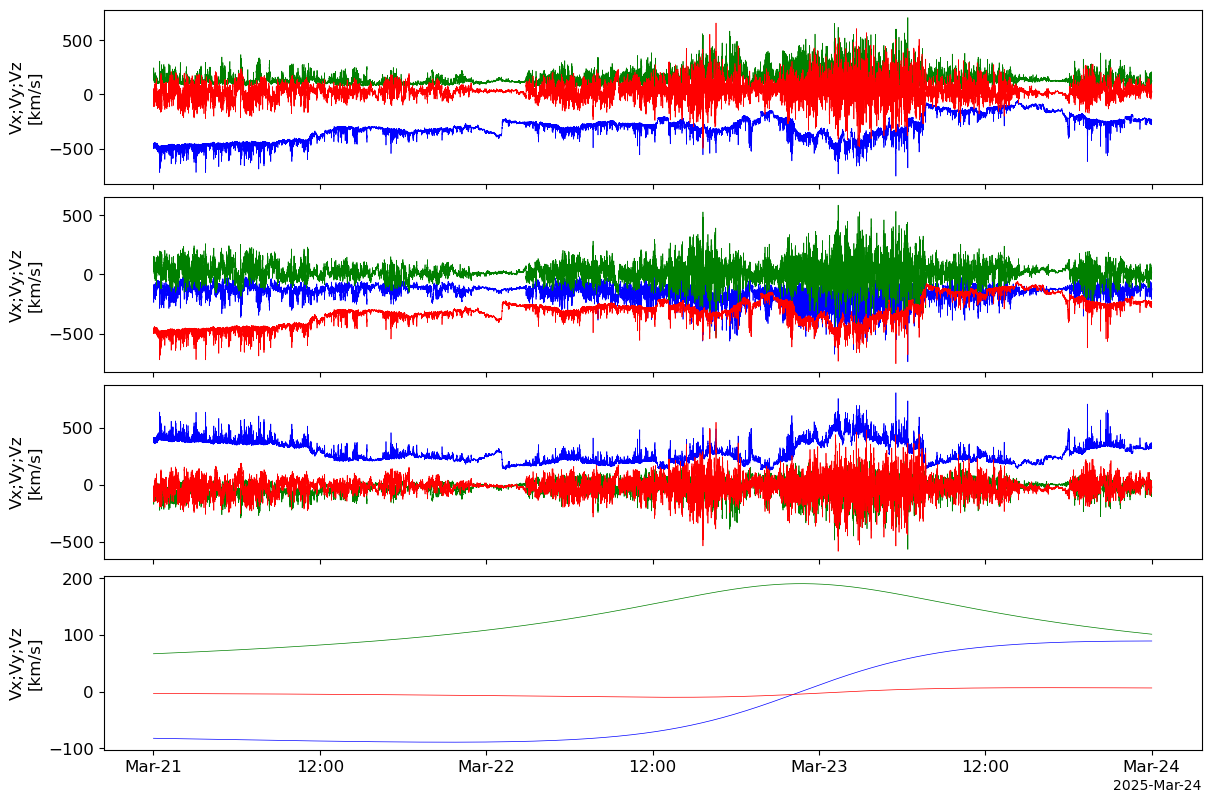

['QUALITY_FLAG',
 'DENS',
 'VEL_INST',
 'VEL_SC',
 'VEL_RTN_SUN',
 'T_TENSOR_INST',
 'TEMP',
 'EFLUX_VS_ENERGY',
 'EFLUX_VS_THETA',
 'EFLUX_VS_PHI',
 'SUN_DIST',
 'VENUS_DIST',
 'SC_VEL_RTN_SUN',
 'QUAT_SC_TO_RTN',
 'MAGF_SC',
 'MAGF_INST']

In [27]:
tplot(['VEL_INST',
 'VEL_SC',
 'VEL_RTN_SUN',
 'SC_VEL_RTN_SUN'])
vars

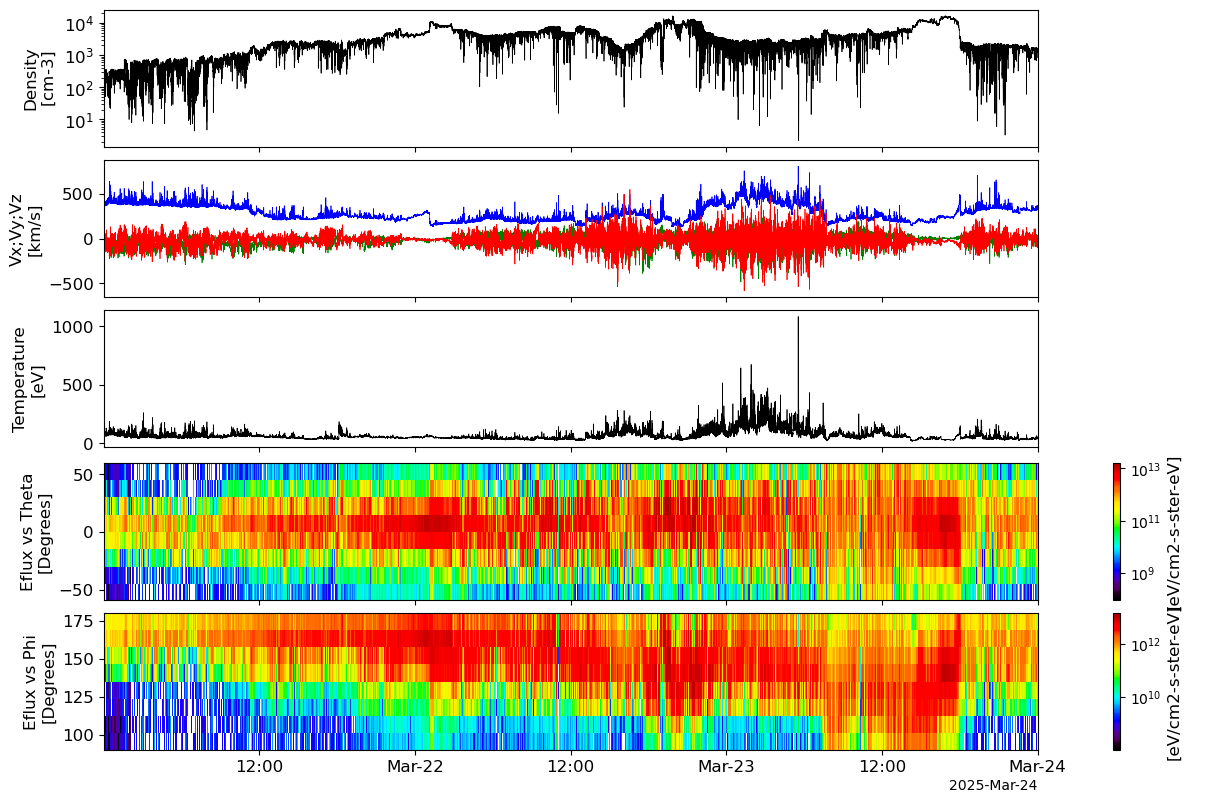

In [30]:
tplot(['DENS', 'VEL_RTN_SUN', 'TEMP', 'EFLUX_VS_THETA', 'EFLUX_VS_PHI'])

In [48]:
path = glob.glob(os.path.join(os.path.realpath(os.path.join(
    os.getenv('PSP_DATA_DIR'), 'sweap/spi/l3/spi_sf0a_l3_mom'
    )), "*"), recursive=True)
files = glob.glob(os.path.join(path[0], '*'))

vars = cdf_to_tplot(files)
dt = get_data('VEL_RTN_SUN')
dt2 = get_data('DENS')
dt3 = get_data('TEMP')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]

In [49]:
rd = {'Time': date_obj, 'vra': dt.y[:, 0], 'vta': dt.y[:, 1], 'vna': dt.y[:, 2], 'Na': dt2.y, 'Ta': dt3.y}
dfalp = pd.DataFrame(data=rd)
# dfalp = dfalp.set_index(dfalp.Time)
dfalp.to_csv(os.path.join(RES_DIR, 'alphas.csv'))

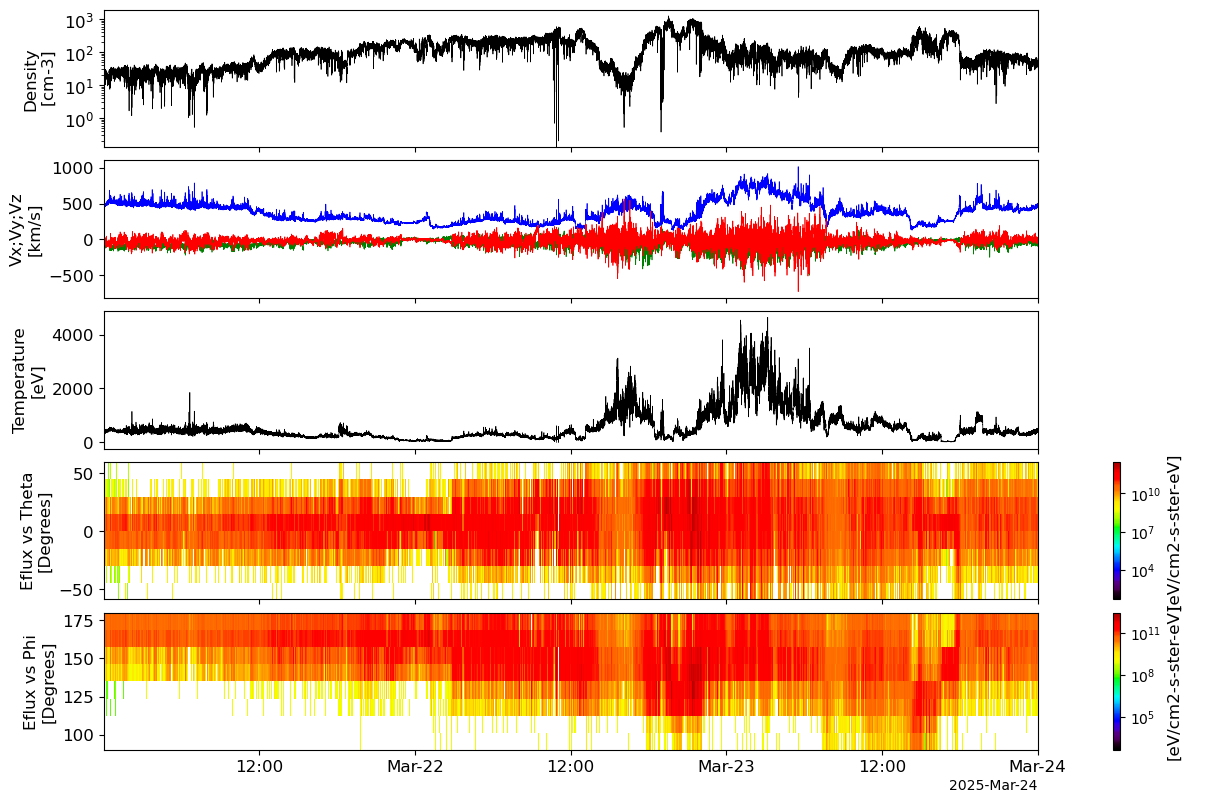

In [50]:
tplot(['DENS', 'VEL_RTN_SUN', 'TEMP', 'EFLUX_VS_THETA', 'EFLUX_VS_PHI'])

In [51]:
files = glob.glob(os.path.join(os.path.realpath(os.path.join(
    os.getenv('PSP_DATA_DIR'), 'sweap/spe/l2/spa_sf1_32e/2025'
    )), "*"), recursive=True)

In [ ]:
# vars = cdf_to_tplot(files)
# dt = get_data('VEL_RTN_SUN')
# dt2 = get_data('DENS')
# dt3 = get_data('TEMP')
# date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]

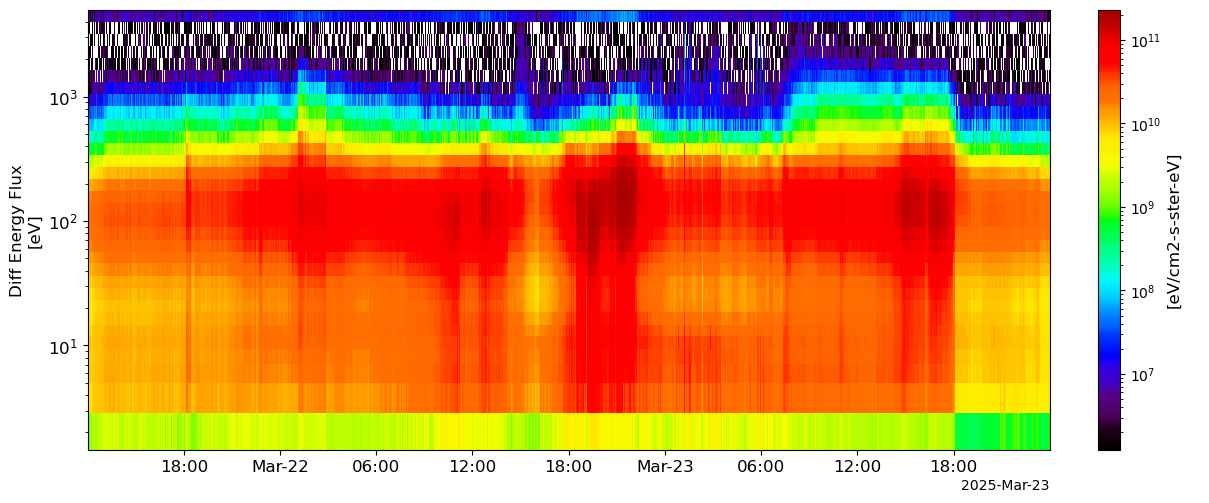

In [52]:
tplot('psp_spe_EFLUX')

The electron density and temperature data are derived from qusai-thermal noise (QTN) measurements, which I have no idea how to process. There appears to be no publicly available code to do this either. Hence, I will skip the electron data for now.

In [ ]:
df = pd.read_csv(os.path.join(RES_DIR, 'protons.csv'), index_col=None)
# dfe = pd.read_csv(os.path.join(RES_DIR, 'electrons.csv'), index_col=None)
# dfet = pd.read_csv(os.path.join(RES_DIR, 'electron_temp.csv'), index_col=None)
dfalp = pd.read_csv(os.path.join(RES_DIR, 'alphas.csv'), index_col=None)
dfmag = pd.read_csv(os.path.join(RES_DIR, 'fields.csv'), index_col=None)

df, dfalp, dfmag = [dd.drop(['Unnamed: 0'], axis=1) for dd in [df, dfalp, dfmag]]
# dfmag = dfmag.drop(['Time.1'], axis=1)

df['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in df.Time]
# dfe['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dfe.Time]
# dfet['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dfet.Time]
dfalp['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in dfalp.Time]
dfmag['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in dfmag.Time]

In [61]:
ff = pd.merge_asof(df, dfalp, on='Time', direction='backward')
# ff = pd.merge_asof(ff, dfe, on='Time', direction='backward')
# ff = pd.merge_asof(ff, dfet, on='Time', direction='backward')
ff = pd.merge_asof(ff, dfmag, on='Time', direction='backward')
ff = ff.set_index('Time')
ff = ff[np.logical_and(ff.Tp > 0, ff.Ta > 0)].copy()
ff

,vr,vt,vn,Np,Tp,angle_vb,vra,vta,vna,Na,Ta,Br,Bt,Bn
Time,,,,,,,,,,,,,,
2025-03-21 00:00:02.298433,391.43906,-71.302925,-124.646030,322.86720,77.619810,1.306409,487.82593,-85.615250,-84.912610,25.815224,377.50394,NaN,NaN,NaN
2025-03-21 00:00:05.793674,390.01666,-60.825497,-124.232370,301.94046,73.559074,1.301464,481.51617,-75.311050,-88.164580,23.067570,372.48355,NaN,NaN,NaN
2025-03-21 00:00:09.288974,392.53433,-46.249150,-126.520030,274.13904,73.294586,1.221839,482.67014,-67.526440,-95.828964,20.184044,360.18213,NaN,NaN,NaN
2025-03-21 00:00:12.784215,389.94992,-62.296030,-108.123604,306.34850,77.091180,1.413429,482.82830,-71.898605,-82.941700,21.438274,381.79282,NaN,NaN,NaN
2025-03-21 00:00:16.279456,386.13820,-79.914856,-94.060460,323.69348,77.670685,1.452735,477.70602,-88.694460,-75.404620,23.395737,403.50974,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23 23:59:43.342395,330.96690,-18.550837,-28.340378,1341.03780,44.369312,1.876016,470.81180,-60.883335,-0.223276,51.735195,418.83615,-569.87670,-51.783060,-109.85770
2025-03-23 23:59:46.837636,331.39926,-25.139784,-27.670425,1382.18700,45.395588,1.871963,482.59430,-41.720400,-15.487565,45.152287,443.08194,-564.14026,-69.417145,-128.91316
2025-03-23 23:59:50.332936,330.57160,-19.572727,-18.175007,1324.46580,43.660740,1.853355,471.38870,-37.750740,-27.147707,42.563927,364.14330,-570.76080,-31.260326,-123.61738


In [63]:
# Calculate time differences between consecutive datetime values
from datetime import timedelta
datetime_list = ff.index.to_list()
time_diff_list = [datetime_list[i + 1] - datetime_list[i] for i in range(len(datetime_list) - 1)]

# Calculate the average time difference
average_time_difference = sum(time_diff_list, timedelta()) / len(time_diff_list)
print(average_time_difference)

# Specify the total time period (e.g., 10 minutes)
total_time_period = timedelta(minutes=20)

# Calculate the number of points
number_of_points = total_time_period / average_time_difference

print(f"Number of Points in {total_time_period}: {int(number_of_points)}")

0 days 00:00:02.577516159
Number of Points in 0:20:00: 465


In [64]:
### ----- CALCULATIONS ----- ###
### Vap
ff['B'] = np.sqrt(ff.Br**2 + ff.Bt**2 + ff.Bn**2)
cost = np.abs(ff.Br/ff.B)
ff['vap'] = (ff.vra - ff.vr)/cost

### Ahe
ff['Ahe'] = ff.Na/ff.Np

### TUBULENCE
ff['use_dens'] = ff['Np'].rolling(window=int((dens_avg*60)/3.5), min_periods=1).mean()
ff['polarity'] = np.sign(ff.Br)
ff['sigmac'],ff['sigmar'], ff['vA'], ff['Zp'],ff['Zm'], ff['deltav'], ff['deltab'], ff['rA'] = sigma.calc_sigma(ff, num=465)
ff = ff.drop(['use_dens'], axis=1)
ff['diff'] = np.abs(ff.vap)/ff.vA

### MACH NUMBER
ff['MA'] = ff.vr / ff.vA

# sound_speed = ion_sound_speed(
#     T_e=np.array(ff.Te)*u.eV/k_B,
#     T_i=np.array(ff.Tp)*u.eV/k_B,
#     # n_e=np.array(ff.Ne)/(u.cm**3),
#     # k=k_2,
#     ion='p',
#     gamma_e=1.29,
#     gamma_i=1.59,
# ).to(u.km/u.s).value
# ff['MS'] = ff.vr / sound_speed
# ff['MMS'] = ff.vr / np.sqrt(sound_speed**2 + ff.vA**2)

### BETA
ff['beta'] = beta(np.array(ff.Tp)*u.eV, np.array(ff.Np)/(u.cm*u.cm*u.cm), np.array(ff.B)*u.nT).value
# ff['betae'] = beta(np.array(ff.Te)*u.eV, np.array(ff.Ne)/(u.cm*u.cm*u.cm), np.array(ff.B)*u.nT).value

# ### MAGNETIC PRESSURE
ff['Pm'] = magnetic_pressure(np.array(ff.B)*u.nT).value

### PROTON PRESSURE
ff['Pp'] = thermal_pressure(np.array(ff.Tp)*u.eV, np.array(ff.Np)/u.cm**3).value

### ALPHA PRESSURE
ff['Pa'] = thermal_pressure(np.array(ff.Ta)*u.eV, np.array(ff.Na)/u.cm**3).value

### ELECTRON PRESSURE
# ff['Pe'] = thermal_pressure(np.array(ff.Te)*u.eV, np.array(ff.Ne)/u.cm**3).value

### PARKER DF
parker = ff.copy()
parker

,vr,vt,vn,Np,Tp,angle_vb,vra,vta,vna,Na,...,Zm,deltav,deltab,rA,diff,MA,beta,Pm,Pp,Pa
Time,,,,,,,,,,,,,,,,,,,,,
2025-03-21 00:00:02.298433,391.43906,-71.302925,-124.646030,322.86720,77.619810,1.306409,487.82593,-85.615250,-84.912610,25.815224,...,NaN,231.044276,NaN,NaN,NaN,NaN,NaN,NaN,4.015197e-09,1.561377e-09
2025-03-21 00:00:05.793674,390.01666,-60.825497,-124.232370,301.94046,73.559074,1.301464,481.51617,-75.311050,-88.164580,23.067570,...,NaN,227.512583,NaN,NaN,NaN,NaN,NaN,NaN,3.558508e-09,1.376637e-09
2025-03-21 00:00:09.288974,392.53433,-46.249150,-126.520030,274.13904,73.294586,1.221839,482.67014,-67.526440,-95.828964,20.184044,...,NaN,229.005368,NaN,NaN,NaN,NaN,NaN,NaN,3.219239e-09,1.164772e-09
2025-03-21 00:00:12.784215,389.94992,-62.296030,-108.123604,306.34850,77.091180,1.413429,482.82830,-71.898605,-82.941700,21.438274,...,NaN,219.060990,NaN,NaN,NaN,NaN,NaN,NaN,3.783823e-09,1.311378e-09
2025-03-21 00:00:16.279456,386.13820,-79.914856,-94.060460,323.69348,77.670685,1.452735,477.70602,-88.694460,-75.404620,23.395737,...,NaN,212.199905,NaN,NaN,NaN,NaN,NaN,NaN,4.028111e-09,1.512520e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-23 23:59:43.342395,330.96690,-18.550837,-28.340378,1341.03780,44.369312,1.876016,470.81180,-60.883335,-0.223276,51.735195,...,245.245177,164.524337,84.847395,2.001316,0.425805,0.985606,0.070570,1.350866e-07,9.533099e-09,3.471688e-09
2025-03-23 23:59:46.837636,331.39926,-25.139784,-27.670425,1382.18700,45.395588,1.871963,482.59430,-41.720400,-15.487565,45.152287,...,244.626706,165.782787,85.227442,2.001197,0.464940,0.986405,0.074378,1.351590e-07,1.005289e-08,3.205341e-09
2025-03-23 23:59:50.332936,330.57160,-19.572727,-18.175007,1324.46580,43.660740,1.853355,471.38870,-37.750740,-27.147707,42.563927,...,246.616187,164.288299,85.854158,2.003805,0.427832,0.980184,0.068080,1.360880e-07,9.264932e-09,2.483273e-09


In [65]:
### FLAG DATA

# check if there is any alpha data
all_nan = parker['Ahe'].isna().all()
parker['flag'] = np.ones(len(parker.Ahe))
if all_nan:
    parker['flag'] = np.zeros(len(parker.Ahe))
else:
    # Flag instances as '0' if all three conditions apply
    # flag_condition_1 = (np.abs(parker.Np - parker.Ne) / parker.Ne) <= 0.5
    flag_condition_2 = (parker.Ahe) <= 0.2
    flag_condition_3 = (np.abs(parker.vap) / parker.vA) <= 2
    # flag_condition_4 = parker.Te < 200 

    # flag_0 = np.logical_and.reduce([flag_condition_1, flag_condition_2, flag_condition_3, flag_condition_4])
    flag_0 = np.logical_and.reduce([flag_condition_2, flag_condition_3])

parker['flag'][flag_0] = 0

03-Nov-25 14:53:05: /tmp/ipykernel_1177/2376996057.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  parker['flag'][flag_0] = 0



In [74]:
spice_kernel_files = [
    "/home/yjzhu/scripts/spice_kernel/de421.bsp",
    "/home/yjzhu/scripts/spice_kernel/naif0012.tls",
    "/home/yjzhu/scripts/spice_kernel/pck00010.tpc",
    "/home/yjzhu/scripts/spice_kernel/heliospheric_v004u.tf",
    "/home/yjzhu/scripts/spice_kernel/spp_recon_20250203_20250401_v001.bsp",
    "/home/yjzhu/scripts/spice_kernel/spp_nom_20180812_20250831_v035_RO2.bsp",
]


spice.initialize(spice_kernel_files)
spice.install_frame('IAU_SUN')

03-Nov-25 15:20:40: Removing 7 existing SPICE frame classes
03-Nov-25 15:20:40: Removing 2 existing SPICE origin classes
03-Nov-25 15:20:40: Installing GSE dynamic frame (1803311) as 'spice_GSE'
03-Nov-25 15:20:40: Creating ICRF frame with EARTH (399) origin
03-Nov-25 15:20:40: Installing ECLIPDATE dynamic frame (1803321) as 'spice_ECLIPDATE'
03-Nov-25 15:20:40: Installing GEORTN dynamic frame (1803410) as 'spice_GEORTN'
03-Nov-25 15:20:40: Creating ICRF frame with SUN (10) origin
03-Nov-25 15:20:40: Installing HEE dynamic frame (1810311) as 'spice_HEE'
03-Nov-25 15:20:40: Installing HEEQ dynamic frame (1810411) as 'spice_HEEQ'
03-Nov-25 15:20:40: Installing HCI dynamic frame (1810420) as 'spice_HCI'
03-Nov-25 15:20:40: Installing IAU_SUN PCK frame (10010) as 'spice_IAU_SUN'


INFO: Removing 7 existing SPICE frame classes [sunpy.coordinates.spice]
INFO: Removing 2 existing SPICE origin classes [sunpy.coordinates.spice]
INFO: Installing GSE dynamic frame (1803311) as 'spice_GSE' [sunpy.coordinates.spice]
INFO: Creating ICRF frame with EARTH (399) origin [sunpy.coordinates.spice]
INFO: Installing ECLIPDATE dynamic frame (1803321) as 'spice_ECLIPDATE' [sunpy.coordinates.spice]
INFO: Installing GEORTN dynamic frame (1803410) as 'spice_GEORTN' [sunpy.coordinates.spice]
INFO: Creating ICRF frame with SUN (10) origin [sunpy.coordinates.spice]
INFO: Installing HEE dynamic frame (1810311) as 'spice_HEE' [sunpy.coordinates.spice]
INFO: Installing HEEQ dynamic frame (1810411) as 'spice_HEEQ' [sunpy.coordinates.spice]
INFO: Installing HCI dynamic frame (1810420) as 'spice_HCI' [sunpy.coordinates.spice]
INFO: Installing IAU_SUN PCK frame (10010) as 'spice_IAU_SUN' [sunpy.coordinates.spice]


In [ ]:
### Create SkyCoord for PSP in the inertial (J2000) frame
tt = pd.to_datetime(ff.index.to_list())

psp_inertial = spice.get_body('Solar Probe Plus',
                              tt , spice_frame='HCI')

### Transform to solar co-rotating frame
psp_carrington = psp_inertial.transform_to(
    scoords.HeliographicCarrington(observer="self")
)

# projection
ts_common = np.array([dt.timestamp() for dt in tt])
psp_vr_ts = [int(dt.timestamp()) for dt in tt]
psp_vr_common = interp1d(psp_vr_ts,ff.vr,bounds_error=False)(ts_common)*u.km/u.s
psp_at_source_surface = psp_funcs.ballistically_project(psp_carrington,vr_arr=psp_vr_common, r_inner=2.5*u.R_sun)

In [77]:
parker['lon'] = psp_carrington.lon.value
parker['lat'] = psp_carrington.lat.value
parker['rAU'] = psp_carrington.radius.to(u.AU).value
parker['sslon'] = psp_at_source_surface.lon.value
parker['sslat'] = psp_at_source_surface.lat.value
parker['ssrAU'] = psp_at_source_surface.radius.to(u.AU).value
parker['NpR2'] = parker.Np * (parker.rAU ** 2)
# parker['NeR2'] = parker.Ne * (parker.rAU ** 2)
parker['BrR2'] = parker.Br * (parker.rAU ** 2)
parker.to_csv(os.path.join(RES_DIR, 'parker_e23_wo_electron.csv'))

In [79]:
parker.columns

Index(['vr', 'vt', 'vn', 'Np', 'Tp', 'angle_vb', 'vra', 'vta', 'vna', 'Na',
       'Ta', 'Br', 'Bt', 'Bn', 'B', 'vap', 'Ahe', 'polarity', 'sigmac',
       'sigmar', 'vA', 'Zp', 'Zm', 'deltav', 'deltab', 'rA', 'diff', 'MA',
       'beta', 'Pm', 'Pp', 'Pa', 'flag', 'lon', 'lat', 'rAU', 'sslon', 'sslat',
       'ssrAU', 'NpR2', 'BrR2'],
      dtype='object')